##Deskripsi dataset

Oleh Afrizal Ihyauddin Yafi' - 1301200362

####**Tentang data set**

Pengelompokan Negara dengan menggunakan "Unsupervised Learning" untuk Lembaga Swadaya Masyarakat "HELP International".

####**Rumusan masalah**
HELP International telah berhasil mengumpulkan sekitar $10 juta. Sekarang CEO LSM perlu memutuskan bagaimana menggunakan uang ini secara strategis dan efektif. Jadi, CEO harus membuat keputusan untuk memilih negara-negara yang paling membutuhkan bantuan. Karenanya, Pekerjaan Anda sebagai ilmuwan Data adalah mengkategorikan negara menggunakan beberapa faktor sosial ekonomi dan kesehatan yang menentukan perkembangan negara secara keseluruhan. Kemudian kita diminta untuk menyarankan negara-negara yang paling perlu menjadi fokus CEO.

*Source:* https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data

##Import Library yang dibutuhkan.

In [ ]:
# Import Lib.

import numpy as np
import pandas as pd
import seaborn as sns
import random as rndm
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from IPython.display import clear_output

##Import data set yang diperlukan.

In [ ]:
# Import dataset "Country-data.csv" (main dataset)

!gdown --id 1VWl7fU3Rh1bIfIkYH9RhB7_oodxBUczn


datF = pd.read_csv("Country-data.csv")
datF


/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1VWl7fU3Rh1bIfIkYH9RhB7_oodxBUczn
To: /content/Country-data.csv
100% 9.23k/9.23k [00:00<00:00, 6.58MB/s]


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
# Import informasi dataset "data-dictionary.csv" (information dataset)

!gdown --id 1ivl1bQFfy2cShUClqtAF0FCsZJTqk9XL

infoDat = pd.read_csv("data-dictionary.csv")
print("")
for i in range(len(infoDat["Column Name"])):
    if infoDat["Column Name"][i] == "health":
      print(infoDat["Column Name"][i],"\t\t: ", infoDat["Description"][i],"\n")
    elif infoDat["Column Name"][i] == "Income":
      print(infoDat["Column Name"][i],"\t\t: ", infoDat["Description"][i],"\n")
    elif infoDat["Column Name"][i] == "gdpp":
      print(infoDat["Column Name"][i],"\t\t: ", infoDat["Description"][i],"\n")
    else:
      print(infoDat["Column Name"][i],"\t: ", infoDat["Description"][i],"\n")

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ivl1bQFfy2cShUClqtAF0FCsZJTqk9XL
To: /content/data-dictionary.csv
100% 808/808 [00:00<00:00, 1.09MB/s]

country 	:  Name of the country 

child_mort 	:  Death of children under 5 years of age per 1000 live births 

exports 	:  Exports of goods and services per capita. Given as %age of the GDP per capita 

health 		:  Total health spending per capita. Given as %age of GDP per capita 

imports 	:  Imports of goods and services per capita. Given as %age of the GDP per capita 

Income 		:  Net income per person 

Inflation 	:  The measurement of the annual growth rate of the Total GDP 

life_expec 	:  The average number of years a new born child would live if the current mortality patterns are to remain the same 

total_fer 	:

###Informasi tentang data set

In [ ]:
# Menampilkan tuple yang mewakili dimensi DataFrame,
# terlihat terdapat 167 buah baris dan 10 buah kolom pada dataframe

datF.shape

(167, 10)

In [ ]:
# Menampilkan ringkasan singkat dari dataframe
datF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
# Menampilkan statistik secara deskriptif

datF.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [ ]:
# Check data yang duplikat

dupliDat = datF.duplicated()
dupliDat

0      False
1      False
2      False
3      False
4      False
       ...  
162    False
163    False
164    False
165    False
166    False
Length: 167, dtype: bool

In [ ]:
# Terlihat tidak ada data yang duplikat
dupliDat.value_counts()

False    167
dtype: int64

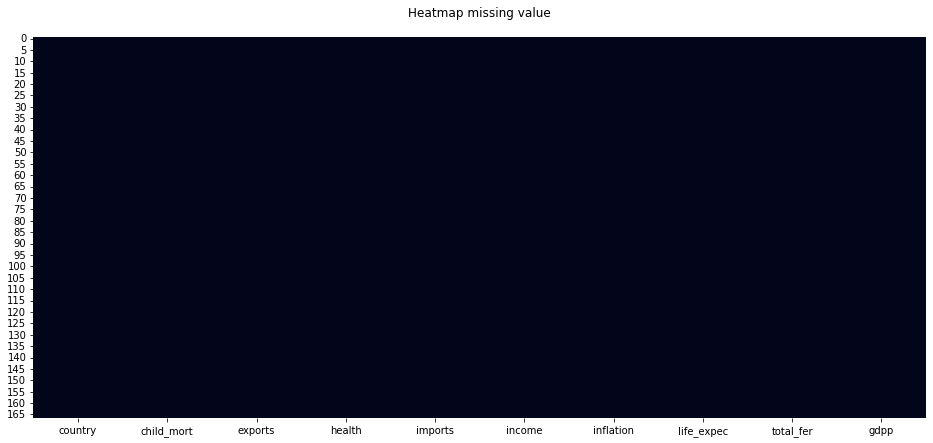

In [ ]:
# Check apakah ada data set yang "missing value" menggunakan visualisasi heatmap

fig, ax = plt.subplots(figsize=(16,7))
sns.heatmap(datF.isnull(), cbar = False)
plt.title("Heatmap missing value\n")
plt.show()

In [ ]:
# Check apakah ada data set yang "missing value"

datF.isna()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
162,False,False,False,False,False,False,False,False,False,False
163,False,False,False,False,False,False,False,False,False,False
164,False,False,False,False,False,False,False,False,False,False
165,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Check "missing value" data

datF.isna().value_counts()

# Terlihat tidak ada data set yang mengalami "missing value",
# maka dari itu, tidak perlu dilakukan penanganan missing value

country  child_mort  exports  health  imports  income  inflation  life_expec  total_fer  gdpp 
False    False       False    False   False    False   False      False       False      False    167
dtype: int64

In [ ]:
# Drop data pada value String, dikarenakan susah dalam dilakukan pre-processing dan processing data

datF = datF.drop(columns="country")
datF

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
# Assign kolom list ke variabel numCol guna dipakai lebih lanjut

numCol = list(datF.columns)
print(numCol)

['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']


##Visualization Data

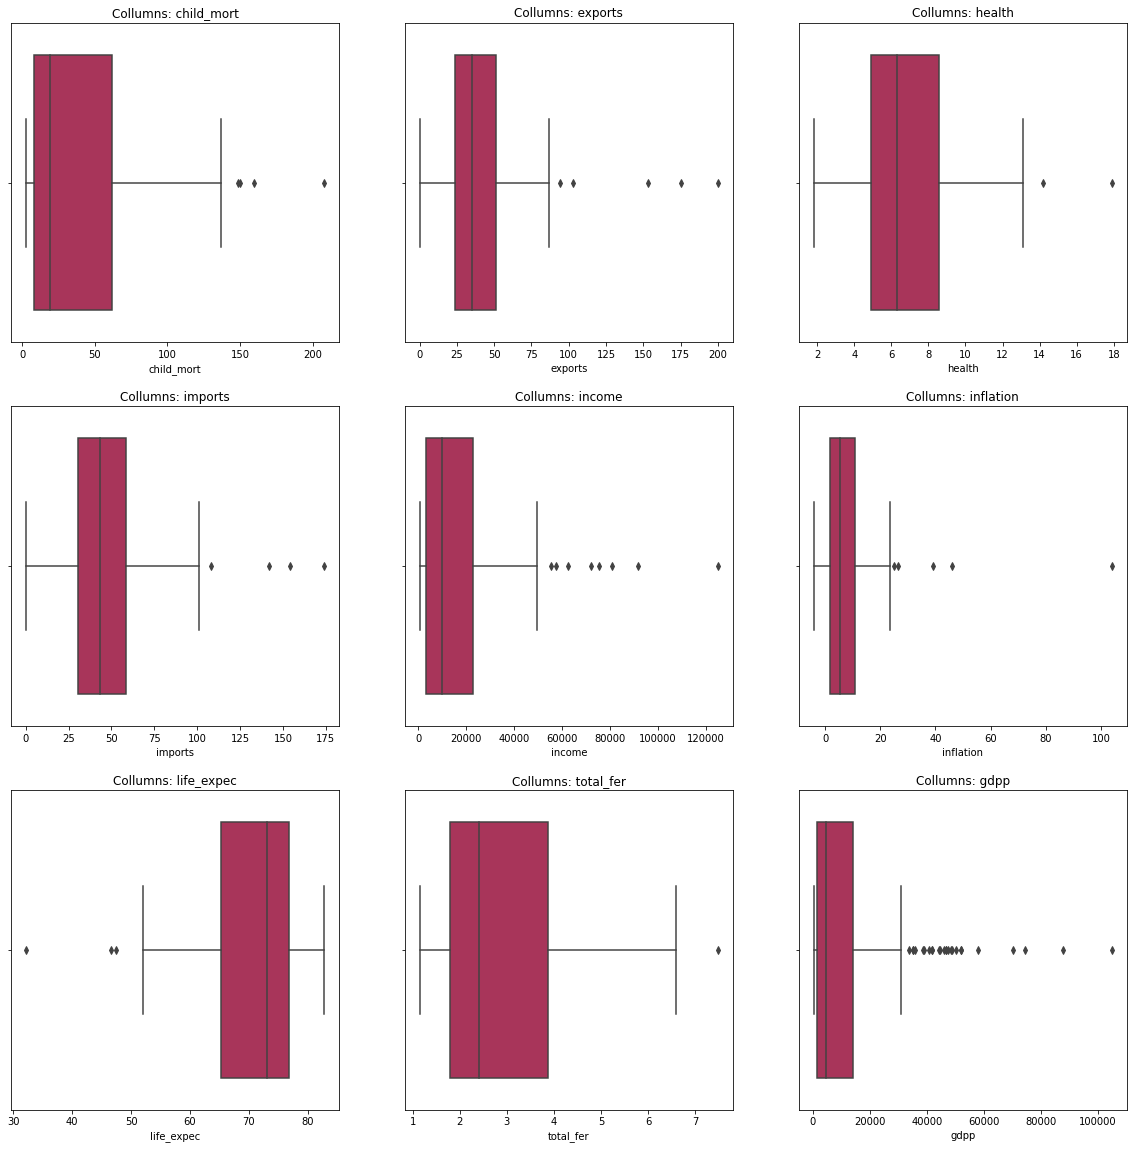

In [ ]:
# Menampilkan box plot beserta informasi outliersnya

colors = ['#bb2253']
fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (20,20))
for i in range(len(numCol)):
    plt.subplot(3,3,i+1)
    sns.boxplot(datF[numCol[i]],color = colors[0])
    title = "Collumns: " + numCol[i]
    plt.title(title)
plt.show()

###Normalization data



In [ ]:
# Melakukan normalisasi dengan metoda min max Scaller

def minMaxScaling(datF) :
    scalled = (datF.iloc[:,0:] - datF.iloc[:,0:].min()) / (datF.iloc[:,0:].max() - datF.iloc[:,0:].min())
    return scalled

NdatF = minMaxScaling(datF)
NdatF

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242
...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299


In [ ]:
# Menampilkan data frame teratas yang sudah di normalisasikan menggunakan metode Min Max Scaller

NdatF.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


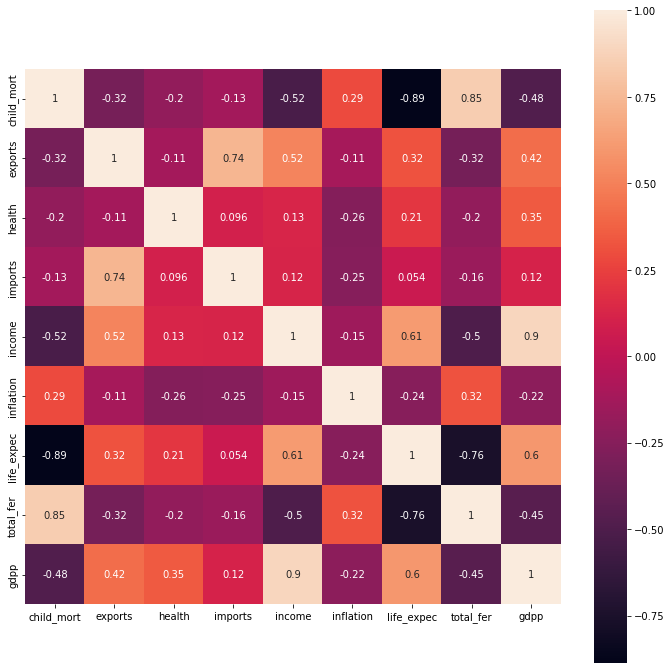

In [ ]:
# Menampilkan korelasi data dalam bentuk heatmap

plt.figure(figsize=(12,12))
sns.heatmap(NdatF.corr(), annot = True , square = True)

In [ ]:
NdatF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    float64
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    float64
dtypes: float64(9)
memory usage: 11.9 KB


In [ ]:
# Menampilkan informasi tentang outliers, seperti jumlah outliers,
# nilai max dan min, dan persentase outliers dari suatu dataset kolom.

def CalcOutliers(NdatF):
    Q1 = NdatF.quantile(0.25)
    Q3 = NdatF.quantile(0.75)
    IQR = Q3 - Q1
    outliers = NdatF[((NdatF < (Q1 - 1.5 * IQR)) | (NdatF > (Q3 + 1.5 * IQR)))]
    return outliers

def info():
  for i in numCol:
    olr = CalcOutliers(NdatF[i])
    percent = len(olr) / len(datF[i]) * 100
    print("\nColumn name\t\t: " + i)
    print("number of outliers\t: " + str(len(olr)))
    print("max outlier value\t: " + str(olr.max()))
    print("min outlier value\t: " + str(olr.min()))
    print("Outliers percentage\t: "+ str(float(percent)), "%\n")

info()


Column name		: child_mort
number of outliers	: 4
max outlier value	: 1.0
min outlier value	: 0.7127555988315482
Outliers percentage	: 2.3952095808383236 %


Column name		: exports
number of outliers	: 5
max outlier value	: 1.0
min outlier value	: 0.4687104471937206
Outliers percentage	: 2.9940119760479043 %


Column name		: health
number of outliers	: 2
max outlier value	: 1.0
min outlier value	: 0.7700435052827843
Outliers percentage	: 1.1976047904191618 %


Column name		: imports
number of outliers	: 4
max outlier value	: 1.0
min outlier value	: 0.6205459424000239
Outliers percentage	: 2.3952095808383236 %


Column name		: income
number of outliers	: 8
max outlier value	: 1.0
min outlier value	: 0.4412779059578265
Outliers percentage	: 4.790419161676647 %


Column name		: inflation
number of outliers	: 5
max outlier value	: 1.0
min outlier value	: 0.269013954348027
Outliers percentage	: 2.9940119760479043 %


Column name		: life_expec
number of outliers	: 3
max outlier value	: 0.303

###Pemodelan

In [ ]:
# Assign var K, iterasi,
# dan max iterasi yang akan
# digunakan untuk prosesing data

NUM_K = 3
ITER = 0
MAX_ITER = 100

In [ ]:
# Membuat fungsi K-Means clustering

def euclidean(x, y):
    eucld = math.sqrt(sum((x - y)**2))
    return eucld

def initCentroid(k, NdatF):
  ctrd = {i: NdatF[rndm.randint(0, len(NdatF))] for i in range(k)}
  return ctrd

def k_means(k, max_iter, NdatF):
    # Inisiasi centroid
    centroid = initCentroid(k, NdatF)
    sumWCSS = 0
    print("\n")
    print("INIT CENTROID")

    # Menampilkan nilai cluster dengan looping
    for i in range(k):
      print(f"Klaster {i+1}: {centroid.get(i)}")

    # Membuat duplikat nilai saat ini
    tempCentroid = centroid.copy()

    # Looping pada range max iterasinya
    for i in range(max_iter):
        # membuat cluster baru

        cluster = {i: [] for i in range(k)}
        tmp = []

        for x in NdatF:
            # mencari nilai centroid terdekat dengan metode euclidean
            distc = [euclidean(x, centroid[c]) for c in centroid]
            tmp.append(min(distc))
            cluster[distc.index(min(distc))].append(x)
        sumWCSS = sum(tmp)
        for cl in cluster:
            centroid[cl] = np.mean(cluster[cl], axis=0)
        print("\n")
        print("ITERASI KE-", i + 1)
        # menampilkan nilai per klaster
        for cl in range(k):
          print(f"Klaster {cl+1}: {centroid.get(cl)}")
        # berhenti jika nilai centroid sebelumnya sama dengan sekarang
        isMatch = True
        for j in range(k):
          if (tempCentroid.get(j) != centroid.get(j))[0]:
            isMatch = False
        if isMatch:
          print("\n\nBERHENTI PADA ITERASI KE-", i+1)
          break
        tempCentroid = centroid.copy()
    return centroid, cluster, sumWCSS

In [ ]:
data = NdatF.to_numpy()
centroid, cluster, _ = k_means(NUM_K, MAX_ITER, data)



INIT CENTROID
Klaster 1: [0.00778968 0.13352777 0.62709758 0.16117656 0.2917494  0.04860919
 0.97238659 0.13880126 0.38531436]
Klaster 2: [0.01411879 0.25659484 0.23617154 0.37045122 0.12533865 0.17844931
 0.75542406 0.05362776 0.05535034]
Klaster 3: [0.01071081 0.09850869 0.4300808  0.11978157 0.32792565 0.04962573
 0.98422091 0.12302839 0.49317069]


ITERASI KE- 1
Klaster 1: [0.01442628 0.20656758 0.56043309 0.23022873 0.28070613 0.05644337
 0.94861414 0.09480325 0.34929527]
Klaster 2: [0.20859423 0.19842442 0.27403792 0.27731107 0.08361496 0.12095567
 0.71616349 0.32244583 0.05551783]
Klaster 3: [0.01363194 0.28588353 0.34210972 0.23560391 0.49192466 0.07850812
 0.95732473 0.1257528  0.55035277]


ITERASI KE- 2
Klaster 1: [0.01695024 0.21415066 0.48367734 0.25489021 0.23632569 0.05767854
 0.92676217 0.08699983 0.27695567]
Klaster 2: [0.23497241 0.18199581 0.26086078 0.26377125 0.06593209 0.12888304
 0.69142012 0.35930599 0.03850487]
Klaster 3: [0.01785135 0.47515841 0.2523997  0.4

## Elbow Methode

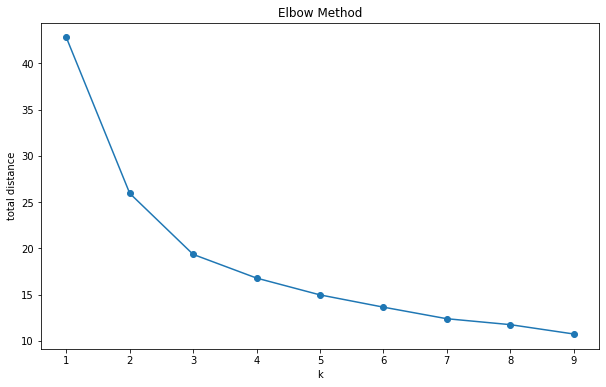

In [ ]:
# Metode Elbow merupakan salah satu metode untuk menentukan jumlah cluster yang tepat,
# melalui persentase hasil perbandingan antara jumlah cluster yang akan membentuk siku pada suatu titik
# Docs: https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.plot.html

distC = []
K = range(1,10)
for k in K:
    kmns = KMeans(n_clusters=k)
    kmns = kmns.fit(NdatF)
    distC.append(kmns.inertia_)

fig, ax = plt.subplots(figsize=(10,6))
plt.plot(K, distC, 'o-')
plt.xlabel('k')
plt.ylabel('total distance')
plt.title('Elbow Method')
plt.show()

In [ ]:
def randomCentroids(data, k):
    centroids = []
    for i in range(k):
        centroid = NdatF.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

# Fungsi untuk menghitung jarak data yang dekat dengan centroid menggunakan rumus
def getLabels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((NdatF - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

# Fungsi untuk mengupdate nilai centroid yang baru pada kelas
def nCentroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [ ]:
# Fungsi menampilkan visualisasi data centroid menggunakan PCA

def pltClusters(data, labels, centroids, iteration):
    pcaVar = PCA(n_components=2)
    dat2D = pcaVar.fit_transform(data)
    centroids2D = pcaVar.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {ITER}')
    plt.scatter(x = dat2D[:,0], y = dat2D[:,1], c = labels)
    plt.scatter(x = centroids2D[:,0], y = centroids2D[:,1])
    plt.show()

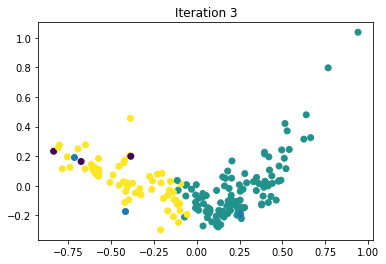

In [ ]:
# Inisiasi fungsi yang akan digunakan
centroids = randomCentroids(NdatF, NUM_K)
pastCentroids = pd.DataFrame()

# Melakukan looping apabila centroid yang lama sama dengan centroid yang sudah di-update
while ITER < MAX_ITER and not centroids.equals(pastCentroids):
    pastCentroids = centroids
    labels = getLabels(NdatF, centroids)
    centroids = nCentroids(NdatF, labels, NUM_K)
    pltClusters(NdatF, labels, centroids, ITER)
    ITER = ITER + 1

In [ ]:
# Menampilkan cluster pada dataframe "Country-data"

centroids

,0,1,2
child_mort,0.712866,0.000000,0.317682
exports,0.107645,0.211420,0.000000
health,0.504511,0.000000,0.210996
imports,0.349498,0.251143,0.000000
income,0.007942,0.142930,0.000000
inflation,0.110917,0.000000,0.116143
life_expec,0.000000,0.861171,0.583858
total_fer,0.420753,0.000000,0.504812
gdpp,0.003896,0.104256,0.000000


In [ ]:
NdatF['Cluster'] = labels
CNdatF = NdatF
CNdatF

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,2
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833,1
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365,1
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,2
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242,1
...,...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143,2
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650,1
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299,1
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299,2


In [ ]:
CNdatF.to_csv("final-Data.csv", encoding="utf-8", index=False)

##Menampilkan hist

In [ ]:
labels.value_counts()

1    105
2     59
0      3
dtype: int64

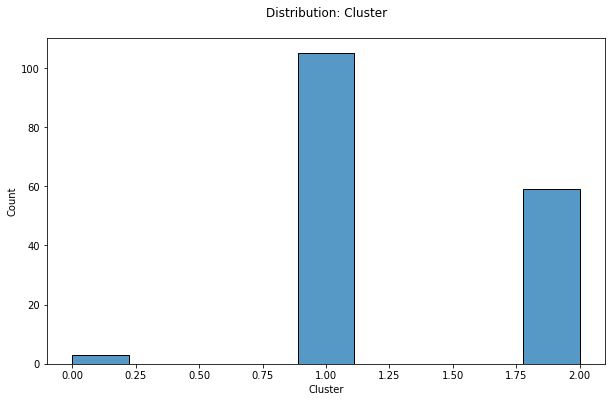

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(CNdatF["Cluster"], stat="count")
title = "Distribution: Cluster\n"
plt.title(title)
plt.show()